# 1 - Time series : Analyses et prédictions
## Modèles de base
Introduction
Dans ce cours nous aborderons les séries temporelles, en anglais time series. Ce sont des séries d'observations qui se distinguent des données habituellement traitées dans des problèmes de Machine Learning car elles sont indexées par le temps et présentent de fortes dépendances temporelles.

L'ordre relatif des différentes observations revêt alors une importance toute particulière. L'objectif de ce cours sera d'apprendre à analyser des séries temporelles, puis de tenter de prédire leur évolution.

Les exemples de séries temporelles au quotidien ne manquent pas et proviennent de très nombreux domaines comme :

- L'économie : chômage, croissance, cours des actions en bourse,...
- L'environnement : pression, température, niveau d'eau des rivières, consommation en éléctricité des foyers,...
- La santé : électrocardiogrammes, taux de sucre,...
On distingue trois grands axes de travail sur les séries temporelles : la visualisation, l'analyse et la prédiction.

Prédire une série temporelle consiste alors à prédire le comportement futur d'un phénomène ce qui explique leur place importante dans la science des données.

## 1 - Importer et afficher une série temporelle
Commençons par mettre en place notre environnement de travail :

- (a) Importer le package pandas, numpy, matplotlib.pyplot sous leurs alias usuels.
- (b) Passer matplotlib en mode inline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Nous allons maintenant voir comment il est possible de charger des données de type séries temporelles stockées dans un fichier csv.

Durant l'intégralité de ce module, nous travaillerons avec la série temporelle Air Passengers. Elle représente le nombre de passagers empruntant l'avion chaque mois entre 1949 et 1960.

- (c) Stocker dans un Dataframe data le contenu du fichier AirPassengers.csv.
- (d) Afficher les 5 premières lignes du Dataframe.

In [2]:
data = pd.read_csv('AirPassengers.csv', sep=';')
data.head()  # import classique : (144, 2) index 0, 1, 2... et colonnes ' Month' + '#Passengers'

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


- (e) Afficher le type de chacune des colonnes du Dataframe à l'aide de l'attribut dtypes

In [3]:
print('Data Types:')
print(data.dtypes)   # verif type des colonnes du df -> 'Month' = objet et '#Passengers' = int64


Data Types:
Month          object
#Passengers     int64
dtype: object


On constate que la colonne qui stocke les dates est de type object. De plus, l'affichage des 5 premières lignes du Dataframe nous permet de constater qu'une colonne index inutile s'est glissée dans notre jeu de données.

Lorsque l'on travaille avec des séries temporelles, ce sont bien les dates qui font office d'index. Il existe plusieurs manières de charger intelligemment des séries temporelles grâce au package pandas, une solution parmi de nombreuses autres possibles est de paramétrer les arguments suivants:  

- L'argument **header**: un entier qui spécifie la ligne utilisée pour les noms de colonnes.

- L'argument **index_col**: 'colx' ou bien un entier qui spécifie quelle colonne fait office d'index.

- L'argument **parse_dates**, spécifique à l'importation de time series : permet de spécifier une liste de colonnes contenant des données temporelles.

- L'argument **squeeze**, un booléen qui spécifie si l'on souhaite récupérer un objet de type Series (True) plutôt que Dataframe (False).  

- (f) À l'aide des 4 arguments présentés ci-dessus, paramétrer la fonction read_csv pour obtenir un objet de type Series, ayant pour index les mois entre 1949 et 1960, et comme données le nombre de passagers ayant voyagé en avion chaque mois.
- (g) Stocker le résultat dans la variable airpass.
- (h) Afficher les 5 premières lignes de airpass.

In [4]:
airpass = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True, squeeze=True,sep=';')
# pas besoin du header=0 car 'Month' est bien le nom de la colonne index
airpass.head()

C:\Users\UserPC\AppData\Local\Temp\ipykernel_7904\1006326922.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  airpass = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True, squeeze=True,sep=';')


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

(i) Vérifier que la série est bien indexée par des données calendaires en affichant l'attribut index de la série.

In [5]:
print(airpass.index)
# aipass.index.dtypes non marche pas, et type(airpass.index) => type serie pandas

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


In [6]:
print(airpass[0])

112


Nous allons terminer cette partie introductive en affichant une représentation graphique de la série temporelle.

(j) Utiliser la fonction plot de matplotlib pour afficher la série airpass.

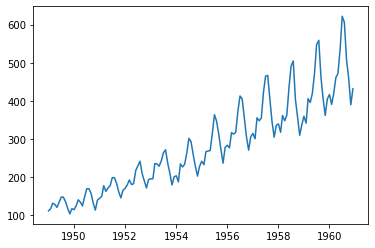

In [7]:
plt.plot(airpass)
plt.show()

## 2 -  Analyser une série temporelle
Maintenant que nous savons importer et afficher une série temporelle, nous allons pouvoir l'analyser pour en tirer des informations intéressantes.

Dans sa forme brute, une série temporelle ne nous donne qu'une quantité très limitée d'informations. En effet, si on se penche sur la série des passagers aériens, on se rend bien compte que la tendance est à l'augmentation avec le temps. Mais du fait des variations saisonnières de la série, cette augmentation est difficile à quantifier.

On considère traditionnellement que trois composantes forment une série temporelle : la tendance, la saisonnalité et le résidu.

- La **tendance ou trend**  Tt  est l'orientation générale de la série à long terme.
- La **saisonnalité ou seasonality**  St  correspond à un phénomène périodique de période identifiée : cela décrit un changement qui arrive périodiquement. C'est la partie "cyclique" du phénomène.
- Le **résidu ou bruit**  ϵt  est donc ce "qui reste" et qui n'est donc expliqué ni par la saisonnalité ni par la tendance. Dans l'idéal le résidu est aléatoire.

Ces trois composantes peuvent se combiner selon deux modèles distincts : le modèle additif ou le modèle multiplicatif.

Dans le modèle additif, on considère que la série temporelle  (Xt) est la résultante de la somme de ces trois composantes. On peut alors noter :
- Xt=Tt+St+ϵt

 
Dans le modèle multiplicatif, on considère que la série temporelle est la résultante du produit de ces trois composantes. On peut alors noter :

- Xt=Tt(1+St)(1+ϵt)

Si nous sommes face à une série temporelle dont le comportement est visiblement celui d'une série multiplicative, nous nous ramènerons toujours au cas de figure additif pour pouvoir dresser des relations linéaire.  
On passe d'un modèle multiplicatif à additif par une **transformée logarithmique**.

- Rappel :  log(Xt) = log( Tt(1+St).(1+ϵt) ) =  log⁡(Tt) + log⁡(1+St) + log⁡(1+ϵt) .
- Après transformée en log, pour retrouver la série originale on passe à l'exponentielle :  exp( log(Xt) ) = Xt

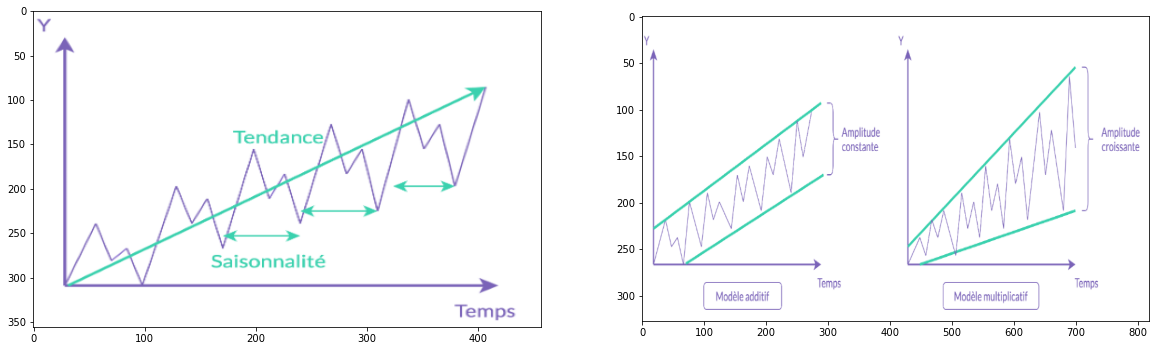

In [8]:
from matplotlib import image
# pour afficher n'importe quelle image du dossier de W
img1 = image.imread('time_serie1.png')
img2 = image.imread('time_serie2.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
ax1.imshow(img1, aspect=0.8)  # aspect = 'auto' ou 'equal' ou i = float multiplie la taille des pixel (1 par défaut )
ax2.imshow(img2, aspect=1.5)




## 3 - Décomposition automatique de la série temporelle

### décomposition additive ou multiplicative

L'analyse de la série temporelle passe donc par la décomposition de la série selon ces trois termes : tendance, saisonnalité et résidu. Le sous module statsmodels.tsa fournit une implémentation d'une décomposition naïve dans une fonction appelée seasonal_decompose. On procède en trois temps :

On applique la fonction seasonal_decompose à la série à décomposer et on stocke le résultat dans une variable.
On appelle la méthode plot sans argument sur cette variable pour visualiser le résultat.
On appelle plt.show() pour afficher le graphique correspondant en sortie de cellule.  
- (a) Importer la fonction seasonal_decompose du sous module statsmodels.tsa.seasonal.
- (b) Appliquer les trois étapes de la décomposition et visualiser le résultat.

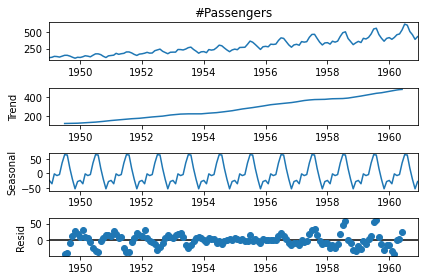

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

res1 = seasonal_decompose(airpass)
res1.plot()
plt.show()

In [17]:
z0 = res1.observed   # attributs pour voir z0= la série étudiée
z1 = res1.trend      # tendance Nan sur 6 1ers mois et 6 derniers, puis entre 126 et 480 en croissance => on voit une tendance linéaire  
z2 = res1.seasonal   # entre -50 et +50 non interprétable
z3 = res1.resid      #  6 Nan au début et 6 Nan en fin puis entre -40 et +50 non interprétable

Comme on peut le voir, la fonction seasonal_decompose nous permet d'obtenir 3 graphiques qui identifient la **tendance, la saisonnalité et le résidu**.

Ici, on peut rapidement conclure que la **décomposition** n'a pas été réussie.   

En effet, le **résidu** présente de grandes variations en fonction du temps. En théorie, on considère qu'une **décomposition est réussie** si la partie résiduelle peut être assimilée à ce que l'on appelle un **bruit blanc faible**.

Un résidu est un **bruit blanc (faible)** s'il est assimilié à une suite de variables aléatoires non corrélées et de variance finie.

Dans notre cas de figure, nous n'avons visiblement pas un résidu de cette forme : le résidu ne semble absolument pas aléatoire. C'est parce que la fonction seasonal_decompose utilise par défaut un **modèle additif**.

Or, un élément devrait nous mettre la puce à l'oreille et nous diriger vers un **modèle multiplicatif** : l'effet saisonnier semble s'accroître avec le temps. Comme nous l'avons vu plus haut, la variation de l'amplitude de l'effet saisonnier est une caractéristique typique des séries multiplicatives.

- (c) Effectuer une nouvelle décomposition en spécifiant cette fois-ci l'argument model = 'multiplicative'.

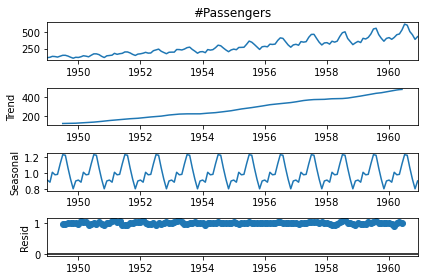

In [18]:
res2 = seasonal_decompose(airpass, model = 'multiplicative')
res2.plot()
plt.show()

In [19]:
z0 = res2.observed   # attribut pour voir z0 = la série étudiée
z1 = res2.trend      # tendance Nan sur 6 1ers mois et 6 derniers, puis entre 126 et 480 en croissance => on voit une tendance linéaire
z2 = res2.seasonal   # toute les valeurs sont proche de 1 à +/- 0.2 près  => très bon indique saisonalité mais proche de 1 => non éliminé
z3 = res2.resid      #  toute les valeurs sont proche de 1 à +/- 0.03 près => très bon indique faible résidu mais proche de 1 => non éliminé

On a effectivement une décomposition plus satisfaisante.  

On peut identifier une tendance croissante linéairement dépendante du temps, ainsi qu'une saisonnalité de période 12 (annuelle). On pouvait s'attendre à cette fréquence de saisonnalité puisque l'on traite des données mensuelles.

### passage aux log du modele multiplicatif => modele additif

Comme nous l'avons expliqué plus haut, lorsque nous sommes dans le cas d'un modèle multiplicatif, pour pouvoir analyser la série nous nous ramenons toujours à un modèle additif par une transformée en  log .

- (d) A l'aide de Numpy, stocker dans la variable airpasslog le logarithme de la série airpass.
- (e) Afficher cette nouvelle série temporelle.

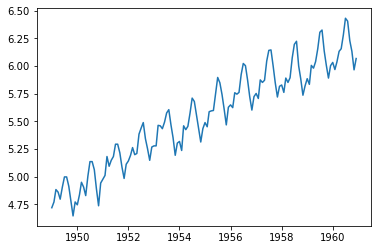

In [14]:
airpasslog = np.log(airpass) # série transformé par log va de 4.7 à 6,4 au lieu de 104 à 622
plt.plot(airpasslog)
plt.show()

En passant à la transformée en  log , on observe une saisonnalité qui semble conserver une ampleur constante au fil du temps : on est passé à un modèle additif.

L'attribut seasonal de la fonction seasonal_decompose permet d'avoir accès aux valeurs de la saisonnalité.

- (f) Exécuter la cellule de code suivante pour afficher la série corrigée de ses variations saisonnières et la série temporelle sur le même graphique .

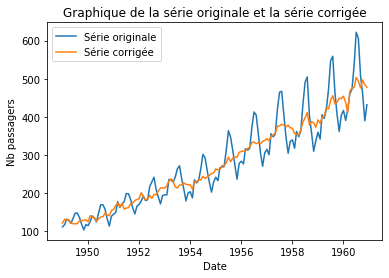

In [32]:
# On applique la fonction seasonal_decompose à airpasslog 

# Ici on utilise la transformée en log on est donc dans un modèle additif

mult = seasonal_decompose(airpasslog)

# On soustrait les coefficients saisonniers à la série airpasslog

cvs=airpasslog- mult.seasonal

# On passe à l'exponentielle pour retrouver la série originale

x_cvs=np.exp(cvs)


# On affiche la série

plt.plot(airpass, label='Série originale')

plt.plot(x_cvs, label='Série corrigée') 

plt.title('Graphique de la série originale et la série corrigée')

plt.xlabel('Date')

plt.ylabel('Nb passagers')

plt.legend()

## 4 - La méthode des moyennes mobiles
La question que l'on peut se poser maintenant : Comment seasonal_decompose arrive à identifier la tendance, la saisonnalité et le résidu à partir de la série ? Grâce à la méthode des moyennes mobiles.

Nous allons reproduire pas à pas la méthode pour comprendre ce que fait la fonction seasonal_decompose.  
Voyons tout d'abord comment identifier la tendance grâce à la moyenne mobile.

- Ici nous voyons un cas particulier de la moyenne mobile : la moyenne mobile centrée mais il existe plusieurs autres types de moyenne mobile.

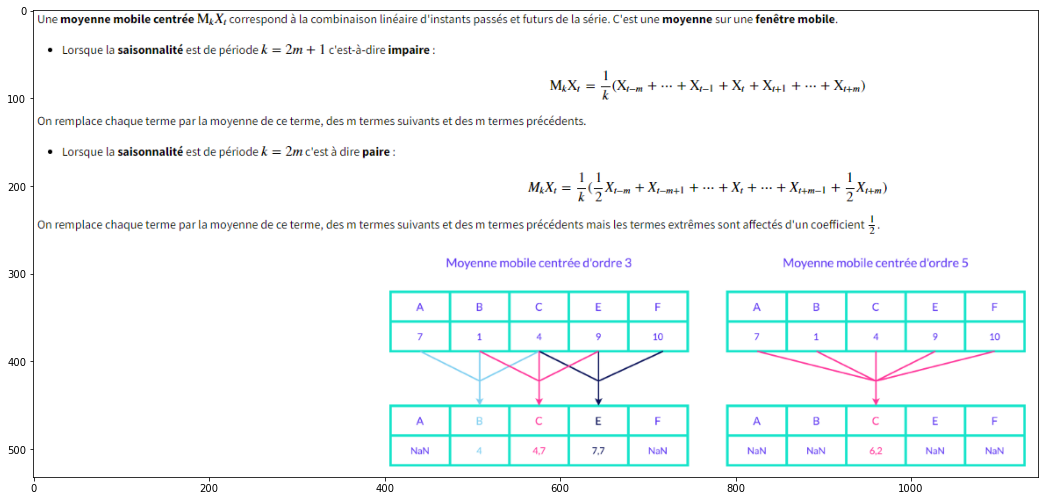

In [42]:
img = image.imread('time_serie3.png')

fig, ax = plt.subplots(figsize=(18, 16))
ax.imshow(img)

On se rend compte à l'aide de l'exemple que le calcul de la moyenne mobile fait apparaître des NaN ce qui est logique pour les extremités de la série, il n'y a pas d'instants passés ou futurs pour faire le calcul.

La moyenne mobile de période k conserve les tendances linéaires et **absorbe les saisonnalités de période k**.  
Elle permet de lisser la série chronologique.

Mettons-la en pratique pour que ce soit plus clair.

La méthode rolling de pandas permet de sélectionner les variables autour de l'une d'entres elles. Combinée avec la méthode mean, elle permet d'obtenir la moyenne mobile. Le paramètre center de la fonction rolling permet de sélectionner si l'on prend les n dernières valeurs, ou la moitié avant et la moitié après.

- (a) A l'aide de la méthode rolling combinée avec mean, calculer la moyenne mobile centrée sur 12 mois et la stocker dans une variable appelée airpass_ma.
- (b) Représenter dans un même graphique la moyenne mobile airpass_ma et la série airpasslog.
- (c) Donner un titre à votre graphique, une légende à vos courbes et des labels à vos axes.

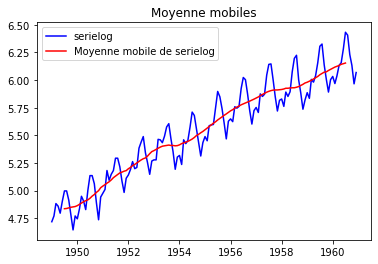

In [20]:
#On a une saisonnalité de période 12

airpass_ma = airpasslog.rolling(window = 12, center = True).mean()

#Affichage de la série 

plt.plot(airpasslog, color = 'blue', label = 'serielog')
plt.plot(airpass_ma, color = 'red', label = 'Moyenne mobile de serielog')
plt.legend()
plt.title('Moyenne mobiles')
plt.show()

Si on souhaite retrouver la série originale, on a juste à passer à l'exponentielle.

- (d) Exécuter la cellule suivante pour passer à l'exponentielle et afficher la série.

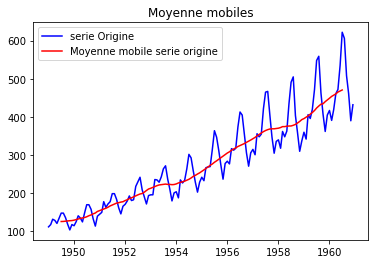

In [21]:
plt.plot(np.exp(airpasslog), color = 'blue', label = 'serie Origine')

plt.plot(np.exp(airpass_ma), color = 'red', label = 'Moyenne mobile serie origine')

plt.legend()

plt.title('Moyenne mobiles')

plt.show()

La **moyenne mobile** permet d'identifier la **tendance** qui est **linéairement croissante** dans notre cas.

Maintenant, voyons comment identifier la **saisonnalité**.

La **saisonnalité** comme nous l'avons dit correspond à un phénomène **périodique**, l'idée est donc que nous allons identifier des coefficients pour chaque **variation saisonnière**. Dans notre cas, nous avons une **saisonnalité** de période 12, nous allons alors déterminer 12 coefficients, pour chaque mois de l'année.

Si on trouve ces 12 coefficients alors il nous sera facile de retrancher la saisonnalité de la série. L'écriture de ce modèle repose sur les hypothèses que nous avons faites : **tendance linéaire** et saisonnalité de période 12.

Comment déterminer ces **coefficients ?** Grâce à la méthode des **moyennes mobiles.**

Elle se fait en 5 étapes :

    - (1) Calcul de la moyenne mobile  M12Xt  pour une approximation de la tendance.
    - (2) Calcul de la différence entre la série  Xt  et sa moyenne mobile  M12Xt. 
    - (3) Calcul des coefficients saisonniers en prenant la moyenne des valeurs trouvées pour chaque mois de l'année.
    - (4) Centrer chaque coefficient saisonnier par soustraction de la moyenne du total.
    - (5) Calcul de la série temporelle corrigée des variations saisonnières en soustrayant la série temporelle initiale des coefficients saisonniers centrés.
- (e) Affecter à la variable airpasslog_without_ma la valeur de la différence entre la série  Xt  et sa moyenne mobile  M12Xt.
- (f) Afficher les 10 premières valeurs.

In [52]:
# Affecter à la variable la différence entre la série et sa moyenne mobile 

airpasslog_without_ma = airpasslog - airpass_ma


# Affichage des 10 premières valeurs 

airpasslog_without_ma.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.161034
1949-08-01    0.158831
1949-09-01    0.068807
1949-10-01   -0.070221
Name: #Passengers, dtype: float64

Comme expliqué plus haut, la moyenne mobile fait apparaître des valeurs manquantes, puisque pour les extremités de la série, on ne peut pas accéder aux termes "autour" de ces valeurs. Nous allons donc les supprimer.

- (g) Supprimer les valeurs manquantes de la série airpasslog_without_ma.
- (h) Afficher les 10 premières valeurs.

In [53]:
# Suppression des valeurs manquantes

airpasslog_without_ma = airpasslog_without_ma.dropna()

# Affichage de la série 

airpasslog_without_ma.head(10) 

Month
1949-07-01    0.161034
1949-08-01    0.158831
1949-09-01    0.068807
1949-10-01   -0.070221
1949-11-01   -0.208742
1949-12-01   -0.085158
1950-01-01   -0.119133
1950-02-01   -0.039333
1950-03-01    0.061597
1950-04-01    0.005616
Name: #Passengers, dtype: float64

Les données manquantes ont bien été supprimées. Nous allons maintenant calculer les coefficients saisonniers. Pour faire des opérations sur la série airpasslog_without_ma, nous allons convertir la série en Dataframe.

- (i) Convertir la série airpasslog_without_ma en Dataframe à l'aide de la méthode .to_frame()des Series et la stocker dans un Dataframe df .
- (j) Ajouter une colonne month au Dataframe df pour indiquer le mois correspondant à chaque variable à l'aide de l'attribut month.
- (k) Afficher les 10 premières lignes du Dataframe.

In [54]:
# Convertir en dataframe 

df=airpasslog_without_ma.to_frame()

# Ajout d'une colonne month 

df['month'] = (df.index).month

df.head(10)

,#Passengers,month
Month,,
1949-07-01,0.161034,7
1949-08-01,0.158831,8
1949-09-01,0.068807,9
1949-10-01,-0.070221,10
1949-11-01,-0.208742,11
1949-12-01,-0.085158,12
1950-01-01,-0.119133,1
1950-02-01,-0.039333,2
1950-03-01,0.061597,3


On a à présent pour chaque observation, le mois correspondant, on va pouvoir calculer le coefficient saisonnier lié à chaque mois de l'année.

- (l) À l'aide des méthodes groupbyet mean, stocker dans une variable seasonality la moyenne par mois de airpasslog_without_ma.
- (m) Centrer chaque coefficient saisonnier par soustraction de la moyenne générale de la série.

In [55]:
# Moyenne par mois à l'aide du groupby 

seasonality = df.groupby('month').mean()

# Centrage des coefficients 

seasonality = seasonality - seasonality.mean()

Nous avons à présent pour chaque mois le coefficient saisonnier centré. Dernière étape avant la visualisation : on va soustraire à la série airpasslog les coefficients saisonniers pour obtenir une série corrigée de ses variations saisonnières.

On remarque que les données de airpass vont de 01/01/1949 à 01/12/1960 ce qui correspond à 12 années complètes. On peut donc créer un vecteur de la même taille que airpasslog, dupliquer 12 fois seasonality et le soustraire à la série originale.

- (n) Créer un vecteur seasonal_vector de taille 144 rempli de zeros.
- (o) A l'aide d'une boucle for, remplir année par année donc 12 par 12, les coefficients saisonniers correspondants, on va donc associer 12 fois seasonality.
- (p) Créer une série airpasslog_cvs qui contiendra la série transformée en  loglog  corrigée de ses variations saisonnières.
- (q) En utilisant airpasslog_cvs, créer une série airpass_cvs qui contiendra la série originale corrigée de ses valeurs saisonnières.

In [56]:
# Création du vecteur 

seasonal_vector = np.zeros(144)

j=0
for i in range(12):
    seasonal_vector[j:j+12] = seasonality.iloc[:,0]
    j=j+12
    
    
# Soustraire les coefficients saisonniers
airpasslog_cvs = airpasslog - seasonal_vector # cvs = corrigée des variation saisonnieres


# On retrouve la série originale par passage à l'exponentielle
airpass_cvs = np.exp(airpasslog_cvs)

Dernière étape : on peut visualier la série et vérifier que notre méthode a bien fonctionné.

- (r) Afficher la série originale airpass et la série corrigée des valeurs saisonnières airpass_csv sur le même graphique.
- (s) Donner un titre à votre graphique, ainsi qu'une légende à vos courbes et des labels à vos axes.

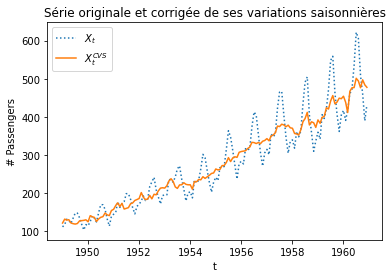

In [57]:
plt.plot(airpass, ':', label = '$X_t$')
plt.plot(airpass_cvs, label = '$X_t^{CVS}$')
plt.title('Série originale et corrigée de ses variations saisonnières')
plt.xlabel('t')
plt.ylabel('# Passengers')
plt.legend();

On peut lire sur la courbe  Xt^CVS  des chutes de fréquentation aux années 1958 et 1960 qu'il aurait été impossible de déceler sur la courbe originale. Voici l'un des intérêts de la désaisonnalisation d'une série temporelle.

Bien que cet exercice portant sur les moyennes mobiles soit suffisant pour appréhender les concepts sous-jacents de la désaisonnalisation, les plus curieux pourront se renseigner sur l'algorithme X-13 ARIMA SEATS, qui est aujourd'hui considéré comme étant l'un des plus performant pour corriger les variations saisonnières.

Facebook développe également un module nommé Prophet qui permet de prédire le futur d'une série. Ce module s'utilise de la même manière que sklearn et vous ne serez pas déboussolés par son utilisation.

**Conclusion et récap**

- Une série temporelle, ou série chronologique est une suite de valeurs numériques indexée par le temps.
- On la décompose en trois termes : la tendance, la saisonnalité et le résidu.
- Lorsque nous somme dans un modèle multiplicatif, on se ramène à un modèle additif par transformée en  log .
- La méthode de la moyenne mobile est une méthode qui permet d'identifier la tendance, la saisonnalité et le résidu. On peut les trouver directement à l'aide de la fonction seasonal_decompose du sous module statsmodels.tsa.seasonal.

# 2 - Introduction aux Modèles ARIMA
Parmi les modèles les plus communément utilisés pour modéliser les séries temporelles on trouve les modèles  ARMAARMA ,  ARIMAARIMA  et  SARIMASARIMA . En effet, les méthodes basiques comme celle des moyennes mobiles se révèlent souvent insuffisantes pour expliquer ces phénomènes.

La popularité de ces modèles réside tout d'abord dans leur performance dans de nombreux domaines d'études mais aussi dans leur relative simplicité et interprétabilité.

## 1-  Le modèle  ARMA 
Le modèle ARMA est le modèle de base pour modéliser une série temporelle et s'appuie sur deux processus très simples.

- 1. Le processus  AR(p) 
Un processus  AR  est un processus autorégressif. Cela signifie donc qu'il réalise une régression sur lui-même et donc détermine une relation linéaire entre l'instant t et les instants précédents.

Mathématiquement une série temporelle ( Xt ) modélisée par un processus  AR  d'ordre  p  noté  AR(p)  relie l'instant  tt  à ses  p  instants précédents. Ce qui peut s'écrire sous la forme :
- Xt = ∑(i=1à p) αi.Xt − i + ϵt

 
Avec  (α1,...,αp) des coefficients à estimer et  ϵt  son résidu.

- 2. Le processus  MA(q)
Un processus  MA  d'ordre  qq  est un processus de moyenne mobile ou moving average. On considère dans ce cas que l'instant  t  est modélisé comme une combinaison linéaire des  q  erreurs (ou résidus) aux instants précédents. On peut écrire l'équation suivante :
- Xt = ϵt + ∑(i=1 à q) βi.ϵt−i

 
Avec  (β1,...,βq)  des coefficients à estimer.

- 3. Le processus  ARMA(p,q) 
Un processus  ARMA  d'ordre  p  et  q  ou  ARMA(p,q)  est donc simplement une combinaison d'un processus  AR(p)  et d'un processus  MA(q) . On peut alors écrire :
- Xt = ∑(i=1 à p) αi.Xt − i + ϵt + ∑(i=1 à q) βi.ϵt−i

 
Intuitivement lorsque l'on modélise une série temporelles par un processus  ARMA(p,q) , on considère qu'elle est expliquée par ses  p  instants précédents mais aussi qu'elle dépend de chocs aléatoires (les erreurs du processus  MA ).

## 2 - Les modèles  ARIMA  et  SARIMA
1. Autocorrélation et différenciation
Pour présenter l'intérêt des modèles  ARIMA  et  SARIMA  par rapport au simple modèle  ARMA , nous allons à nouveau travailler sur le jeu de données Airpass qui recense le trafic aérien entre 1949 et 1959. On importe aussi les mêmes bibliothèques que dans le notebook précédent.

- (a) Importer pandas, numpy, matplotlib.pyplot sous leurs alias usuels.
- (b) Importer statsmodels.api sous l'alias sm.
- (c) Charger le jeu de données "AirPassengersv2.csv" dans une Series nommée airpass en utilisant la fonction read_csv de pandas.

On précise le header et la colonne correspondant à l'index.

Avec l'argument parse_dates=[0] on précisera la conversion automatique au format datetime de la première colonne.

On spécifiera squeeze = True pour renvoyer une Series et non un DataFrame.
- (d) Afficher les 5 premières lignes d'airpass.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

airpass = pd.read_csv('AirPassengers2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, sep=';')
airpass.head()

C:\Users\UserPC\AppData\Local\Temp\ipykernel_7724\3623509665.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  airpass = pd.read_csv('AirPassengers2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, sep=';')


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [4]:
airpass.describe()

count    132.000000
mean     262.492424
std      106.625799
min      104.000000
25%      176.500000
50%      239.500000
75%      343.250000
max      559.000000
Name: #Passengers, dtype: float64

Pour nous ramener encore une fois à un modèle additif avec une variance saisonnière constante, nous allons appliquer une transformation logarithmique.

- (e) Stocker dans la Series airpasslog la transformée en  loglog  de la série temporelle.
- (f) Visualiser airpasslog.

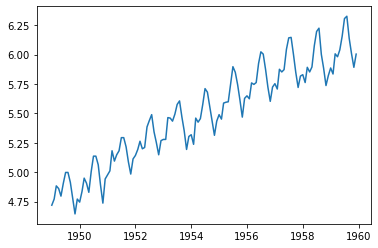

In [5]:
airpasslog = np.log(airpass)
plt.plot(airpasslog);

Si la transformation logarithmique permet d'obtenir une variation saisonnière d'amplitude quasi constante, on remarque que notre série temporelle présente une tendance forte.

Ainsi notre série n'est pas stationnaire. Cependant l'une des limitations du modèle  ARMA  est qu'il ne peut modéliser que des processus stationnaires.

Mathématiquement on définit la stationnarité d'une série temporelle ( Xt ) (au sens faible) comme :

- Une moyenne ou espérance constante  𝔼(Xt) = μ  
- Une variance constante et finie  Var(Xt) = σ² < ∞  
- L'autocorrélation entre la variable  Xt  et la variable  Xt−k  dépend uniquement du décalage k, et est égale quel que soit  t .

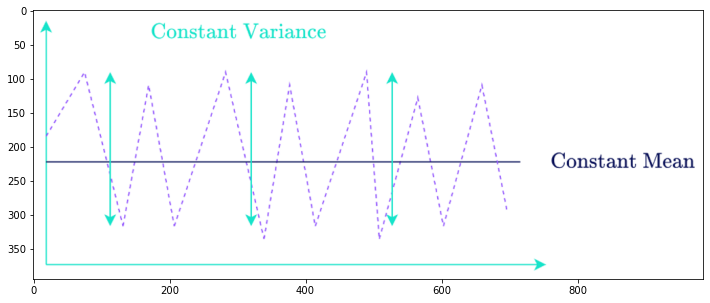

In [10]:
from matplotlib import image
img = image.imread('serie_stationnaire.png')

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)

Ainsi pour modéliser notre série temporelle nous allons donc chercher à la **stationnariser**.

Pour cela on procède par différenciation, c'est à dire que nous allons travailler sur des différences entre les valeurs de notre série temporelle.

Pour visualiser cette transformation, prenons un exemple :

Imaginons une série  Xt  ayant une tendance linéaire, on a alors  Xt = αt + ϵt 
- (g) Lancer la cellule suivante pour générer une série avec une tendance linéaire et légèrement bruitée.

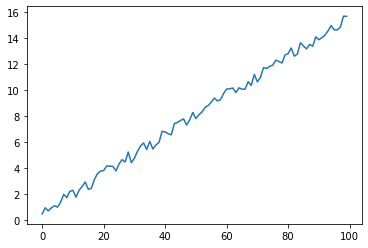

In [11]:
epsilon = np.random.rand(100) #Bruit Blanc
t  = np.linspace(0,10,100) # Temps
alpha = 1.5 #coefficient de tendance
total = pd.DataFrame(alpha * t + epsilon)
plt.plot(total);

Si on la différencie on a alors :  Xt − X(t−1) = α + ϵt − ϵ(t−1).

La tendance a été supprimée et donc notre série est stationnaire, intuitivement on peut alors comprendre comment la différenciation permet de stationnariser les séries temporelles.

- (h) Lancer la cellule suivante pour visualiser la série différenciée une fois.

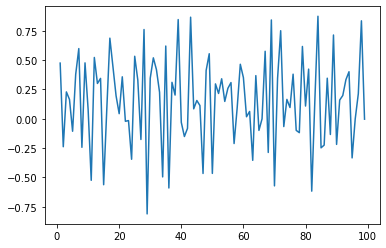

In [12]:
total_diff = total.diff().dropna() # différenciation de la série 'total' Xt- Xt-1 et efface le NaN du début => pour supprimer la TENDANCE
plt.plot(total_diff);

Pour visualiser si une série est stationnaire, on peut regarder son **diagramme d'autocorrélation** (  3ème  propriété de la stationnarité), mais il convient aussi de regarder directement la série transformée pour voir s'il subsiste encore une tendance ou une saisonnalité.

L'autocorrélation d'une série temporelle correspond la corrélation entre l'instant t et l'instant t-h. La **fonction d'autocorrélation  ρ(h)**  correspond donc à la corrélation de la série avec elle-même.

ρ(h) = Corr(Xt,Xt−h)

 
On peut donc voir l'autocorrélation comme la **racine du  R²**  de la régression linéaire entre  Xt  et  Xt−h.



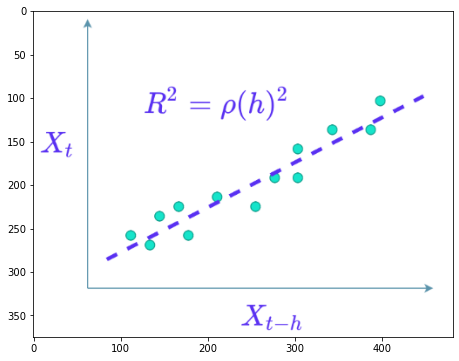

In [14]:
img = image.imread('autocorrelation.png')

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

En complément de cette notion, on définit aussi l'autocorrélation partielle d'une série temporelle  r(h) (  comme la corrélation entre l'instant  t  et l'instant  t − h  sans prendre en compte la contribution des instants intermédiaires.

r(h) = Corr(Xt,Xt−h | Xt−1,…,Xt−h+1)

 
Pour un processus stationnaire, l'autocorrélation simple décroit rapidement vers 0.

Il existe plusieurs bibliothèques qui proposent des visualisations de la fonction d'autocorrélation d'une série de données.   
Nous commencerons par utiliser la **fonction autocorrelation_plot** du sous-package pandas.plotting prenant en argument une Series.

(i) Visualiser la fonction d'autocorrélation de la série de données.

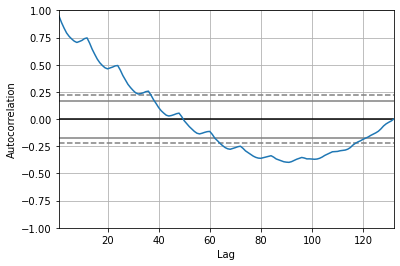

In [15]:
pd.plotting.autocorrelation_plot(airpasslog);

On constate que la décroissance de la fonction d'autocorrélation est relativement lente. On applique donc une différenciation d'ordre 1 sur notre série temporelle afin de voir si cela nous permet de la stationnariser.

Pour différencier une série temporelle on peut utiliser la méthode diff de pandas. Elle prend en argument l'ordre de différenciation c'est à dire l'écart entre les deux valeurs à différencier.

   Lorsqu'on applique une différenciation d'ordre  pp  sur une série temporelle, les  pp  premières valeurs de la série différenciée sont manquantes puisqu'on n'a aucune information sur les valeurs de la série pour un temps antérieur au temps initial. On ne doit donc pas oublier d'enlever les valeurs manquantes de la série différenciée avant de la manipuler.
- (j) Instancier airpasslog_1 en différenciant la série temporelle airpasslog à l'ordre 1.
- (k) Visualiser la série différenciée.
- (l) Visualiser la fonction d'autocorrélation de la série différenciée.

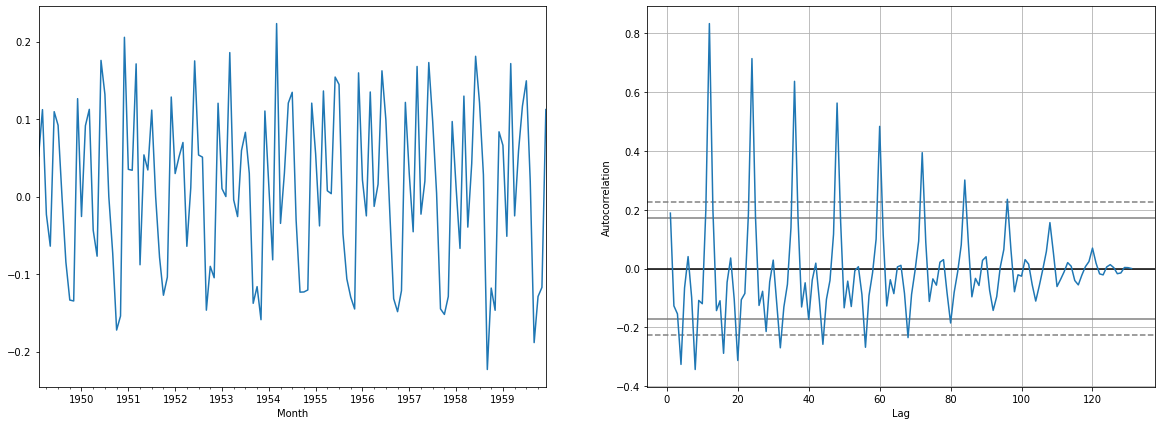

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Création de la figure et des axes

airpasslog_1 = airpasslog.diff().dropna() # Différenciation ordre 1

airpasslog_1.plot(ax = ax1) #Série temporelle différenciée

pd.plotting.autocorrelation_plot(airpasslog_1, ax = ax2); #Autocorrélogramme de la série différenciée

L'autocorrélation simple semble tendre vers 0 mais présente des pics saisonniers importants (On peut aussi voir ses motifs saisonniers directement dans le graphe de la série). Nous allons donc différencier la série temporelle de manière à éliminer la saisonnalité empêchant la stationnarité (pas encore de décroissance rapide vers zéro).

Comme on pouvait s'y attendre intuitivement la série temporelle semble présenter une saisonnalité de période 12 : le trafic aérien est plus important en été qu'en hiver à cause des vacances estivales.

L'utilisation du pramètre periods de la méthode diff permet de différencier une série temporelle afin de la désaisonnaliser selon une période.

- (m) Instancier airpasslog_2 en effectuant une différenciation en saisonnalité sur airpasslog_1 à l'aide de la méthode diff de pandas.
- (n) Visualiser la série doublement différenciée.
- (o) Visualiser la fonction d'autocorrélation de la série doublement différenciée.

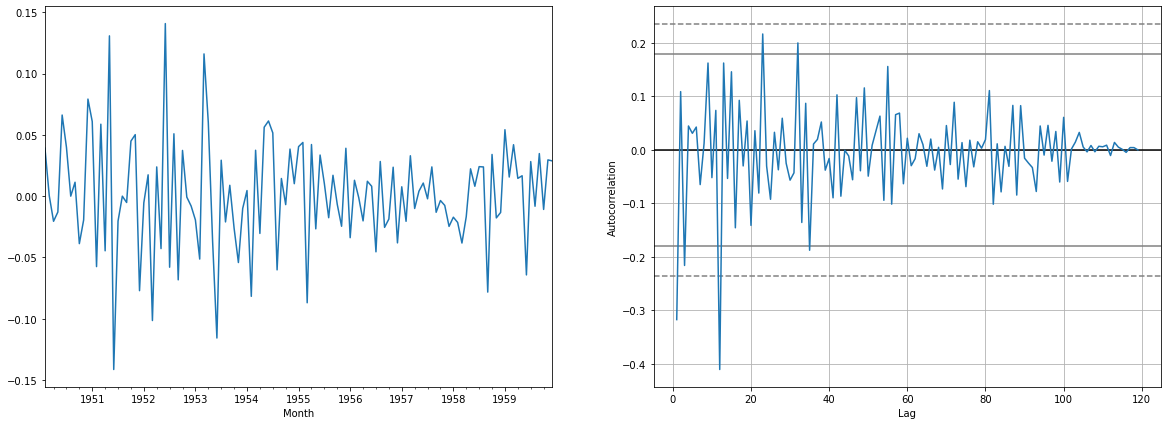

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) #Création de la figure et des axes

airpasslog_2 = airpasslog_1.diff(periods = 12).dropna() #Différenciation d'ordre 12

airpasslog_2.plot(ax = ax1) #Série doublement différenciée

pd.plotting.autocorrelation_plot(airpasslog_2, ax = ax2); #Autocorrélogramme de la série

On arrive ici à un résultat assez satisfaisant malgré les quelques pics irréguliers. On peut dire que les valeurs décroissent suffisamment rapidement pour qu'on puisse considérer le processus comme probablement stationnaire. Par ailleurs, la série doublement différenciée ne semble plus présenter ni de tendance ni de saisonnalité.

Le processus de différenciation se fait itérativement, et nécessite de faire des essais et d'analyser les sorties que l'on obtient. Pour s'assurer de la stationnarité de la série différenciée, il est nécessaire de réaliser un test statistique. Il en existe plusieurs, nous utiliserons le plus commun, le **test augmenté de Dickey-Fuller (ADF)**.

Pour une p-valeur inférieure à 5% nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

Le test ADF est implémenté dans la libraire statsmodels à travers la fonction adfuller du sous-module tsa.stattools qui prends en argument la Seriesà tester. Le deuxième valeur renvoyée par la fonction correspond à la p-valeur du test.

- (p) Appliquer le test augmenté de Dickey-Fuller à la série doublement différenciée. 
- Est-elle stationnaire ?

In [18]:
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(airpasslog_2)
p_value  # p-valeur de 1% on peut considérer la série comme stationnaire.

0.0010165214009068243

En ayant différencié une fois avec une période de 1 et une autre selon la saisonnalité avec une période de 12, nous avons stationnarisé la série temporelle.

Il est désormais possible de la modéliser en utilisant un processus  ARMA .

Cependant on utilisera plutôt un modèle  ARIMA  (Auto Regressive Integrated Moving Average) qui permet d'effectuer automatiquement ce processus de première différenciation.

Le modèle modèle  **SARIMA**  (Seasonal ARIMA) quant à lui rajoute la prise en compte d'un terme saisonnier et la différenciation de période 12.

Nous verrons comment entraîner l'un de ces modèles dans le dernier notebook du module

# 3 - Entraînement d'un modèle SARIMA
Une fois la série temporelle différenciée, il est alors possible de la modéliser à l'aide d'un processus  ARMA  ou  SARIMA  qui prend en compte une saisonnalité et intègre directement le processus de différenciation.

Nous allons reprendre notre travail sur la série Airpass et réutiliser le travail de stationnarisation que nous avons effectué dans le notebook précédent

- Rappel : pour stationnariser notre série temporelle nous avions déjà appliqué une fois une différenciation simple et une différenciation d'ordre 12.
Lancer la cellule suivant pour importer les bibliothèqes, charger la série et appliquer le processus de double différenciation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

airpass = pd.read_csv('AirPassengers2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, sep=';') 

airpasslog = np.log(airpass) #Transformée logarithmique

airpasslog_1 = airpasslog.diff(periods=1).dropna() #Differenciation simple 

airpasslog_2 = airpasslog_1.diff(periods = 12).dropna() #Différenciation d'ordre 12 pour la saisonnalité k = 12

C:\Users\UserPC\AppData\Local\Temp\ipykernel_7724\3454070321.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  airpass = pd.read_csv('AirPassengers2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, sep=';')


## I. Choix des ordres d'un processus  SARIMA 
- a) Saisonnalité et ordres de différenciation
Un modèle SARIMA s'écrit sous la forme  SARIMA(p,d,q)(P,D,Q)k

Les termes en  d  et  D  correspondent aux degrés de différenciation utilisés pour stationnariser la série temporelle.

La seconde parenthèse contenant les termes en majuscule correspond à la partie saisonnière de la  SARIMA  et  k  indique la saisonnalité utilisée.



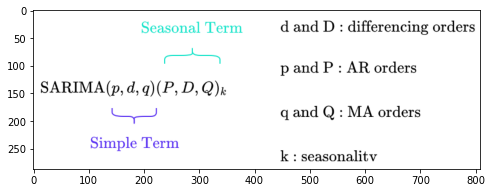

In [23]:
img = image.imread('SARIMA1.png')

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

Ainsi le processus  SARIMA  combine à la fois une différenciation simple et saisonnière avec un processus  ARMA  simple et un processus  ARMA selon la saisonnalité.

Dans notre exercice nous avions identifié une saisonnalité de période 12 ( k=12 ). De plus nous avons fait une différenciation simple ( d=1 ) et une différenciation saisonnière ( D=1 ) pour stationnariser notre série temporelle.

Ainsi notre modèle sera de la forme  SARIMA(p,1,q)(P,1,Q)12 . Il convient alors de choisir les bons ordres  p ,  q ,  P  et  Q  pour nos processus ARMA.

- b) Ordres des modèles AR(p) ou MA(q)
Pour déterminer les ordres d'un processus  AR  ou  MA , il est possible de s'appuyer à nouveau sur ses diagrammes d'autocorrélation ou autocorrélogrammes.

Plutôt que pandas nous utiliserons cette fois la bibliothèque statsmodels qui permet de visualiser aussi l'autocorrélation partielle d'une série temporelle.

Mathématiquement pour une série temporelle suivant un processus  AR(p)  , son autocorrélation simple (ACF) décroit vers 0, mais son autocorrélation partielle (PACF) s'annule après le rang  p .

Pour une série temporelle suivant un processus  MA(q) , son autocorrélation simple (ACF) s'annule après le rang  qq  et son autocorrélation partielle (PACF) décroit vers 0.

La fonction d'autocorrélation est appelée ACF pour Autocorrelation function en anglais et son équivalent partiel est appelé PACF.

- Voici un exemple d'autocorrélogramme simple et partiel pour un processus  AR(2) .



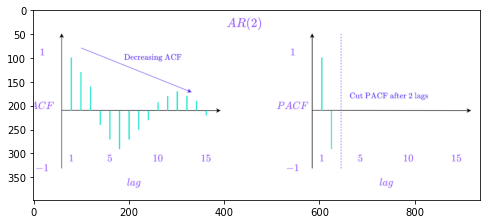

In [24]:
img = image.imread('SARIMA2.png')

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

Cependant pour les processus  ARMA(p,q)  la distinction n'est pas aussi claire et les autocorrélations simples et partielles tendent vers 0.

Voir règles pour déterminer visuellement les ordres p et q :

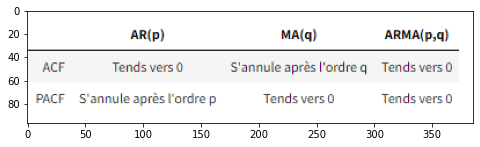

In [25]:
img = image.imread('SARIMA3.png')

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

Pour tracer les autocorrélogrammes simples et partiels de notre série temporelle, nous allons utiliser les fonctions plot_acf et plot_pacf du sous module statsmodels.graphics.tsaplots. Elle prennent en argumument la série à étudier et avec lags le nombre de décalages à étudier

- (a) Visualiser sur 36 décalages les autocorrélogrammes simple et partiel de la série doublement différenciée

C:\Users\UserPC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


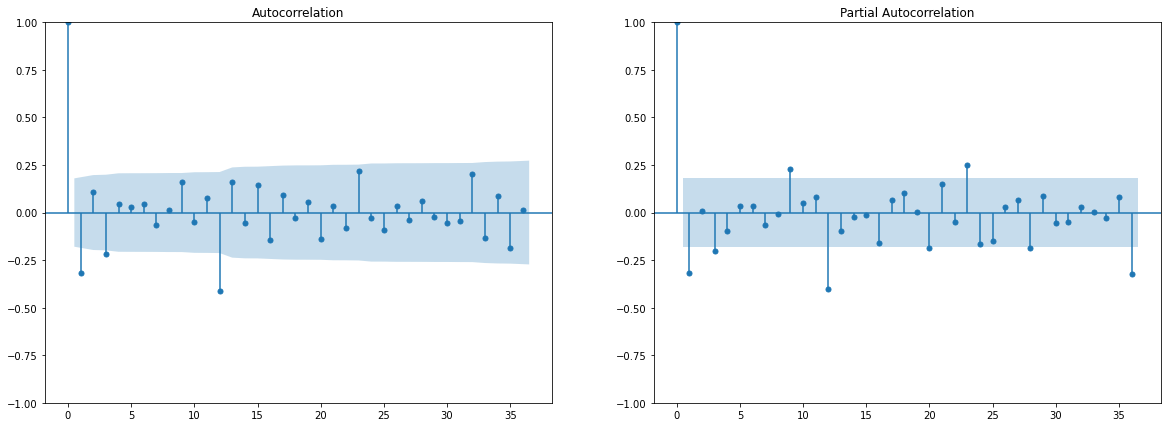

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf  # pacf = graph partiel autocorrelation , acf = graph autocorrelation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(airpasslog_2, lags = 36, ax=ax1)
plot_pacf(airpasslog_2, lags = 36, ax=ax2)
plt.show()

La zone bleue représente la zone de non significativité des autocorrélations, cela signifie que pour les autocorrélations dans cette zone : elles ne sont pas significativement différentes de 0 d'un point de vue statistique.

Nous remarquons que le premier pic a une valeur de 1, en effet il correspond à un décalage nul et sert donc d'échelle pour la suite de l'autocorrélogramme.

On remarque qu'à la fois l'autocorrélation simple et partielle tendent vers 0 (hormis les pics saisonniers), il ne semble pas y avoir de coupure en particulier. On peut donc supposer un processus  ARMA(p,q) . Nous allons donc commencer par estimer via un  ARMA(1,1)  la partie non saisonnière de notre série temporelle.

Pour les ordres saisonniers ( P  et  Q ), il suffit de se référer aux mêmes règles mais en regardant uniquement les pics saisonniers (n fois la période). Ici on regarde donc les  12ème ,  24ème  et  36ème pics.

Pour l'autocorrélation simple, on observe une forte valeur au  12ème  pic, tandis que le  24ème  et  36ème  pics sont extrêmement faibles. Ainsi la règle sur l'ACF pour un processus  MA(1  est respectée.

Pour l'autocorrélation partielle, le  12ème  pic est encore significatif. Le  24ème  est dans la limite de zone de non significativité et le  36ème  est à nouveau important. Il n'y pas de coupure mais plutôt une décroissance. Ainsi la règle sur la PACF pour un processus  MA(1)  est aussi respectée.

Ainsi on peut supposer pour la partie saisonnière un processus  MA(1)  ce qui est équivalent à un  ARMA(0,1)  .

Ainsi pour les ordres  p ,  q ,  P  et  Q  nous avons:

Une décroissance de l'ACF et la PACF sans coupure nette : modèle  ARMA(1,1)  , (on prend  p = q = 1  pour débuter mais il est possible de rajouter des termes si le modèle ne semble pas suffisamment performant).  

Pour les pics saisonniers (12, 24, 36), une coupure de l'ACF après la première période et une décroissance de la PACF : modèle  MA(1) 
Nous allons donc entraîner un modèle  SARIMA(1,1,1)(0,1,1)12 .

## II. Entraînement et sélection du modèle
On commence par créer une instance du modèle en lui donnant les paramètres et les données, puis on appelle la méthode fit sans arguments, comme suit :

- m = modèle(données, order=(p,d,q), seasonal_order = (P,D,Q,k))
- m_fitted = m.fit()
La classe SARIMAX se trouve dans le sous-package statsmodels.tsa. Pour analyser les résultats on utilise la méthode summary() du modèle ajusté.

- (a) Instancier un modèle SARIMAX correspondant au modèle  SARIMA(1,1,1)(0,1,1)12 .
- (b) Ajuster le modèle sur les données.
- (c) Afficher les résultats.  

Attention, on a utilisé les séries airpasslog_1 et airpasslog_2 pour déterminer quel degré de différenciation appliquer. On repart bien de notre série non différenciée airpasslog pour appliquer le modèle SARIMA qui se chargera de faire la différenciation. Rappelez-vous, c'est de là que vient le "I" de SARIMA.

In [27]:
model=sm.tsa.SARIMAX(airpasslog,order=(1,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

C:\Users\UserPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UserPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.758
Date:                            Wed, 17 Aug 2022   AIC                           -439.516
Time:                                    22:18:52   BIC                           -428.400
Sample:                                01-01-1949   HQIC                          -435.002
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2116      0.236      0.897      0.370      -0.251       0.674
ma.L1         -0.5486      0.207   

## résultats

Les résultats sont très détaillés et il convient de prendre son temps pour les analyser correctement. La première partie est un résumé et présente peu d'informations intéressantes hormis les critères d'information sur lesquels on reviendra.

La deuxième partie (après Covariance Type) correspond à l'estimation des différents paramètres du modèle. La première colonne (coef) correspond donc au coefficient assigné à chacun des termes du modèle.

Ainsi le premier terme ar.L1 correspond au coefficient associé au terme  AR  d'ordre 1 pour la partie non saisonnière. Tandis que le terme ma.S.L12 correspond au coefficient associé au terme  MA  d'ordre 1 pour la partie saisonnière (indiqué par le S).

La deuxième colonne (std error) correspond à l'écart type sur l'estimation du coefficient et la troisième (z) à la valeur de la statistique utilisée pour tester la significativité de chaque paramètre.

La colonne qui nous intéresse le plus est la  4ème  (P>|z|) qui indique la p-valeur pour la significativité de chaque paramètre. Ici nous voyons que le paramètre  ARAR  d'ordre 1 a une p-valeur bien supérieure à 5%. Nous pouvons donc considérer ce terme comme non significatif et le supprimer pour simplifier le modèle.

Nous allons donc ajuster cette fois un modèle  SARIMA(0,1,1)(0,1,1)12 .

- (d) Créer un modèle SARIMAX correspondant au modèle  SARIMA(0,1,1)(0,1,1)12 .
- (e) Ajuster le modèle sur les données.
- (f) Afficher les résultats.

In [28]:
model = sm.tsa.SARIMAX(airpasslog,order=(0,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

C:\Users\UserPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UserPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.627
Date:                            Wed, 17 Aug 2022   AIC                           -441.253
Time:                                    22:20:42   BIC                           -432.916
Sample:                                01-01-1949   HQIC                          -437.868
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3483      0.081     -4.299      0.000      -0.507      -0.189
ma.S.L12      -0.5624      0.094   

## résulats

Cette fois-ci tous les paramètres semblent être significatifs dans le modèle. Mais ce n'est pas pour autant que le travail est terminé ! Nous devons vérifier que le résidu est un bruit blanc c'est à dire que la partie non expliquée par le modèle est complètement aléatoire et ne contient pas d'information supplémentaire.

Le test de Ljung-Box est un test de blancheur des résidus. C'est un test statistique qui vise à rejeter ou non l'hypothèse  H0  : Le résidu est un bruit blanc. Ici on lit sur la ligne Prob(Q) que la p-valeur de ce test est de  0.79 , donc on ne rejette pas l'hypothèse.

Le test de Jarque-Bera est un test de normalité. C'est un test statistique qui vise à rejeter ou non l'hypothèse  H0  : Le résidu suit une distribution normale. Ici on lit sur la ligne Prob (JB) que la p-valeur du test est de  0.56 . On ne rejette donc pas l'hypothèse.

Le résidu vérifie les hypothèses que l'on a faites à priori. On peut donc conclure que le modèle  SARIMA(0,1,1)(0,1,1)12  est satisfaisant. Nous allons maintenant utiliser ce modèle pour faire une prédiction à l'horizon d'un an sur le trafic aérien. Les prédictions s'effectuent à l'aide de la méthode predict appliquée à un modèle ajusté. Cette méthode prend deux paramètres d'index entiers, indiquant le premier et le dernier mois de la prédiction à effectuer, numérotés depuis la première observation (sarima.predict(start_index, end_index)).

- (h) Prédire les valeurs de la série sur les 12 mois suivant la dernière valeur (penser à la transformation  loglog  qu'on avait réalisée ...).
- (i) Concaténer les prédictions à la série originale.
- (j) Visualiser l'intégralité de la série ainsi que les prédictions effectuées.
- (k) Tracer une ligne verticale sur ce graphe au niveau de la démarcation entre observations et prédictions (on pourra créer un objet datetime avec datetime.date(1960,1,1) pour indiquer l'abscisse)

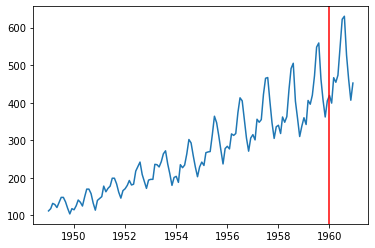

In [29]:
import datetime
pred = np.exp(sarima.predict(132, 143))#Prédiction et passage à l'exponentielle

airpasspred = pd.concat([airpass, pred])#Concaténation des prédictions

plt.plot(airpasspred) #Visualisation

plt.axvline(x= datetime.date(1960,1,1), color='red'); # Ajout de la ligne verticale

En plus de la méthode predict de statsmodels qui peut prédire sur n'importe quelle période, il existe la méthode forecast qui prédit out of the bag c'est à dire qui complète la série temporelle.

Il est aussi possible de représenter un intervalle de confiance autour de la prédiction en se basant sur les méthodes get_forecastet get_prediction.

- (l).Lancer la cellule suivante pour visualiser l'intervalle de confiance sur la prédiction

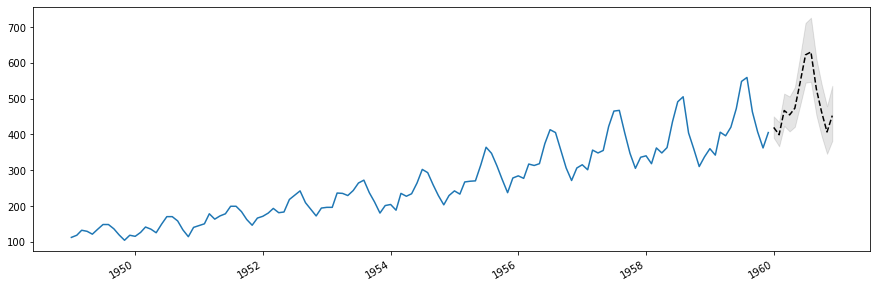

In [30]:
prediction = sarima.get_forecast(steps =12).summary_frame()  #Prédiction avec intervalle de confiance

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(airpass)
prediction = np.exp(prediction) #Passage à l'exponentielle

prediction['mean'].plot(ax = ax, style = 'k--') #Visualisation de la moyenne

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Visualisation de l'intervalle de confiance

## III . Pour aller plus loin
L'utilisation des autocorrélogrammes pour déterminer les ordres de la  SARIMA  n'est pas une règle forte. L'interprétation n'en pas toujours aisée et univoque.

Ainsi il faut voir cette méthode comme une aide pour le choix de ces paramètres mais qui devra ensuite être confirmée via l'étude de leur significativité et la vérification de la blancheur des résidus.

Il peut arriver que plusieurs modèles différents soient pertinents lorsque toutes les hypothèses sont validées. Dans ce cas pour choisir quel modèle conserver, on pourra s'appuyer sur les critères d'information AIC, BIC et HQIC indiqués dans la première partie des résultats de la  SARIMA .

Le critères d'information sont des mesures statistiques permettant de quantifier la performance d'un modèle tout en prenant en compte sa parcimonie. Ainsi un bon critère d'information indique un modèle performant avec peu de paramètres. On sélectionnera donc le modèle avec les critères d'information les plus faibles.

Une autre façon de sélectionner un modèle parmi plusieurs peut être de réaliser une phase de validation croisée comme pour les autres algorithmes de machine learning.

Ce qu'il faut retenir
On peut décomposer en quelques étapes la méthodologie pour entraîner un modèle  SARIMA  :

On détermine tout d'abord si la série est additive ou multiplicative et on détermine la saisonnalité.
On stationnarise par différenciation et on détermine  d  et  D .
A l'aide des autocorrélogrammes on réalise une primo-estimation des ordres  p ,  q ,  P  et  Q .
On affine le choix des paramètres en étudiant leur significativité et on vérifie les hypothèses sur les résidus.
Si plusieurs modèles sont pertinents, on en choisit un à l'aide des critères d'information et/ou par validation croisée.